# Features Summary of Water Quality Data

This dataset contains water quality measurements from various sites, with the following key features:

- **Site_Id**: Identifier for the site where the data was collected (String).
- **Unit_Id**: Identifier for the unit, mostly missing values.
- **Read_Date**: Date of the reading, indicating the time of data collection.
- **Salinity (ppt)**: Salinity levels in parts per thousand (ppt).
- **Dissolved Oxygen (mg/L)**: Concentration of dissolved oxygen in milligrams per liter.
- **pH (standard units)**: pH level of the water, measured in standard units.
- **Secchi Depth (m)**: Measurement of water transparency or clarity, in meters.
- **Water Depth (m)**: Depth of water at the site, in meters.
- **Water Temp (°C)**: Water temperature in degrees Celsius.
- **Air Temp-Celsius**: Air temperature in Celsius (has few records).
- **Air Temp (°F)**: Air temperature in Fahrenheit, more complete than the Celsius version.
- **Time (24:00)**: Time of the reading in 24-hour format.
- **Field_Tech**: Name or identifier of the field technician who took the measurement.
- **DateVerified**: Date the data was verified.
- **WhoVerified**: Name or identifier of the person who verified the data.
- **AirTemp (C)**: Air temperature in Celsius, complete and consistent with the dataset.
- **Year**: Year of data collection.

## Preprocessing and visualizations

In [57]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns

In [58]:
file_path = os.path.join('..', 'data', 'BKB_WaterQualityData_2020084.csv')
df = pd.read_csv(file_path, index_col=False)

In [59]:
df.head()

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaN,NaN,8.0,1994
1,Bay,NaN,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaN,NaN,2.6,1994
2,Bay,NaN,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaN,NaN,7.6,1994
3,Bay,NaN,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.7,1994
4,Bay,NaN,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaN,NaN,0.0,1994


In [60]:
df['Read_Date'] = pd.to_datetime(df['Read_Date'])
df = df.set_index('Read_Date')
df['Year'] = df['Year'].astype(int)

In [61]:
df.columns

Index(['Site_Id', 'Unit_Id', 'Salinity (ppt)', 'Dissolved Oxygen (mg/L)',
       'pH (standard units)', 'Secchi Depth (m)', 'Water Depth (m)',
       'Water Temp (?C)', 'Air Temp-Celsius', 'Air Temp (?F)', 'Time (24:00)',
       'Field_Tech', 'DateVerified', 'WhoVerified', 'AirTemp (C)', 'Year'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2371 entries, 1994-01-03 to 2018-12-11
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site_Id                  2370 non-null   object 
 1   Unit_Id                  32 non-null     object 
 2   Salinity (ppt)           2241 non-null   float64
 3   Dissolved Oxygen (mg/L)  1520 non-null   float64
 4   pH (standard units)      2276 non-null   float64
 5   Secchi Depth (m)         2298 non-null   float64
 6   Water Depth (m)          2300 non-null   float64
 7   Water Temp (?C)          2250 non-null   float64
 8   Air Temp-Celsius         85 non-null     float64
 9   Air Temp (?F)            2300 non-null   float64
 10  Time (24:00)             2308 non-null   object 
 11  Field_Tech               2332 non-null   object 
 12  DateVerified             453 non-null    object 
 13  WhoVerified              453 non-null    object 
 14  AirTem

In [63]:
df.isnull().sum()

Site_Id                       1
Unit_Id                    2339
Salinity (ppt)              130
Dissolved Oxygen (mg/L)     851
pH (standard units)          95
Secchi Depth (m)             73
Water Depth (m)              71
Water Temp (?C)             121
Air Temp-Celsius           2286
Air Temp (?F)                71
Time (24:00)                 63
Field_Tech                   39
DateVerified               1918
WhoVerified                1918
AirTemp (C)                   0
Year                          0
dtype: int64

1. **Data Cleaning and Feature Selection**

To prepare the data for anomaly detection, we removed columns with a high proportion of missing values and those not relevant to our analysis. Specifically, we dropped the following columns:

- `Site_Id`, `Unit_Id`, `Air Temp-Celsius`, `Field_Tech`, `DateVerified`, and `WhoVerified`

These columns had limited information or non-numeric data that doesn’t support anomaly detection.

In [64]:
df = df.drop(columns=['Site_Id', 'Unit_Id','Air Temp-Celsius', 'Field_Tech', 'DateVerified', 'WhoVerified', 'Year']) 

For the remaining columns, we will fill missing values using the mean of each feature to ensure a complete dataset.

In [65]:
df.columns

Index(['Salinity (ppt)', 'Dissolved Oxygen (mg/L)', 'pH (standard units)',
       'Secchi Depth (m)', 'Water Depth (m)', 'Water Temp (?C)',
       'Air Temp (?F)', 'Time (24:00)', 'AirTemp (C)'],
      dtype='object')

In [66]:
df['Salinity (ppt)'] = df['Salinity (ppt)'].fillna(df['Salinity (ppt)'].mean())
df['Dissolved Oxygen (mg/L)'] = df['Dissolved Oxygen (mg/L)'].fillna(df['Dissolved Oxygen (mg/L)'].mean())
df['pH (standard units)'] = df['pH (standard units)'].fillna(df['pH (standard units)'].mean())
df['Secchi Depth (m)'] = df['Secchi Depth (m)'].fillna(df['Secchi Depth (m)'].mean())
df['Water Depth (m)'] = df['Water Depth (m)'].fillna(df['Water Depth (m)'].mean())
df['Water Temp (?C)'] = df['Water Temp (?C)'].fillna(df['Water Temp (?C)'].mean())
df['Air Temp (?F)'] = df['Air Temp (?F)'].fillna(df['Air Temp (?F)'].mean())

In [67]:
df = df.select_dtypes(include=['number'])

In [68]:
df_resampled = df.resample('W').mean()  #  resample the data to a weekly frequency, calculating the mean for each week
df = df_resampled.interpolate(method='time')

In [69]:
df.head()

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp (?F),AirTemp (C)
Read_Date,,,,,,,,
1989-05-14,0.717068,6.646263,7.500000,0.300000,0.9,17.0,62.051637,-17.777778
1989-05-21,0.717068,12.000000,7.500000,0.200000,0.6,17.5,68.900000,20.500000
1989-05-28,0.717068,6.646263,8.000000,0.400000,0.8,23.0,77.000000,25.000000
1989-06-04,0.717068,12.000000,8.000000,0.400000,0.9,25.5,84.200000,29.000000
1989-06-11,0.717068,11.107711,8.083333,0.383333,0.9,26.0,83.900000,28.833333


### Feature selection

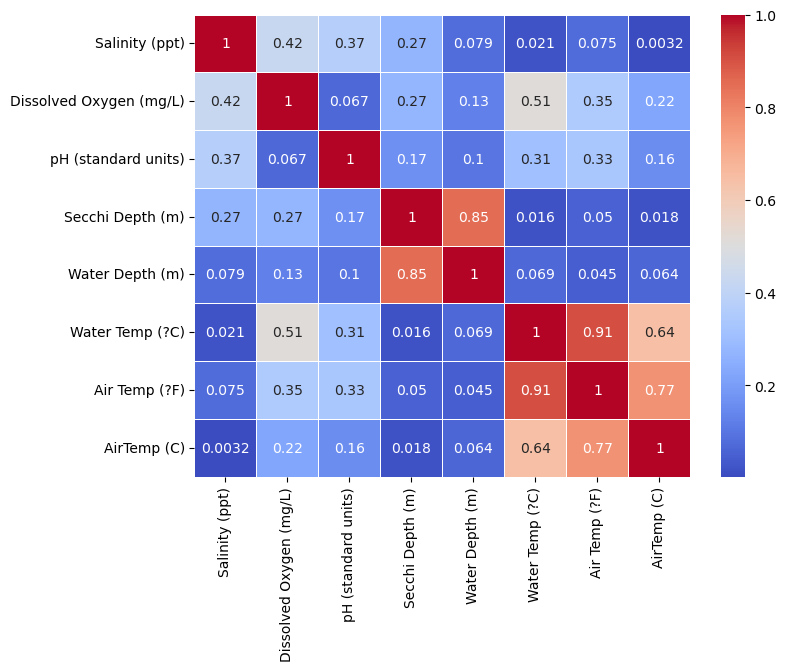

In [70]:
plt.figure(figsize=(8, 6))
corr_matrix = df.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [71]:
def correlation(df, threshold):
    '''
    Th
    '''
    col_corr = set()  # Set of all the names of correlated columns
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [72]:
corr_features = correlation(df, 0.8)
len(set(corr_features))

2

In [73]:
select_df = df.drop(corr_features, axis=1)

In [74]:
select_df.head()

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Temp (?C),AirTemp (C)
Read_Date,,,,,,
1989-05-14,0.717068,6.646263,7.500000,0.300000,17.0,-17.777778
1989-05-21,0.717068,12.000000,7.500000,0.200000,17.5,20.500000
1989-05-28,0.717068,6.646263,8.000000,0.400000,23.0,25.000000
1989-06-04,0.717068,12.000000,8.000000,0.400000,25.5,29.000000
1989-06-11,0.717068,11.107711,8.083333,0.383333,26.0,28.833333


In [75]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.palettes import Set1_6

output_notebook()


plots = []
colors = Set1_6
for i, column in enumerate(select_df.columns):

    p = figure(x_axis_type="datetime", title=column, width=500, height=200)
    color = colors[i % len(colors)]
    p.line(select_df.index, select_df[column], line_width=2, color=color)

    plots.append(p)

grid = gridplot(plots, ncols=2)

show(grid)

Loading BokehJS ...

In [76]:
select_df.columns

Index(['Salinity (ppt)', 'Dissolved Oxygen (mg/L)', 'pH (standard units)',
       'Secchi Depth (m)', 'Water Temp (?C)', 'AirTemp (C)'],
      dtype='object')

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the selected columns
df_scaled_ = scaler.fit_transform(select_df[select_df.columns])

# Convert to DataFrame and keep column names
df_scaled = pd.DataFrame(df_scaled_, columns=select_df.columns)
df_scaled.head()

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Temp (?C),AirTemp (C)
0,-0.222081,-0.293043,0.429936,-0.613595,-0.101129,-3.122130
1,-0.222081,2.273111,0.429936,-0.952922,-0.034617,0.532294
2,-0.222081,-0.293043,1.249761,-0.274268,0.697018,0.961915
3,-0.222081,2.273111,1.249761,-0.274268,1.029580,1.343799
4,-0.222081,1.845418,1.386399,-0.330823,1.096092,1.327887


In [78]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler on all features in select_df
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(select_df)  

# Convert scaled data back to DataFrame if needed
X_scaled_df = pd.DataFrame(X_scaled, columns=select_df.columns)

X_scaled_df.head()

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Temp (?C),AirTemp (C)
0,0.079674,0.408830,0.438202,0.027933,0.508793,0.000000
1,0.079674,0.783217,0.438202,0.016760,0.523757,0.746479
2,0.079674,0.408830,0.578652,0.039106,0.688367,0.834236
3,0.079674,0.783217,0.578652,0.039106,0.763189,0.912243
4,0.079674,0.720819,0.602060,0.037244,0.778154,0.908992


### Boxplots

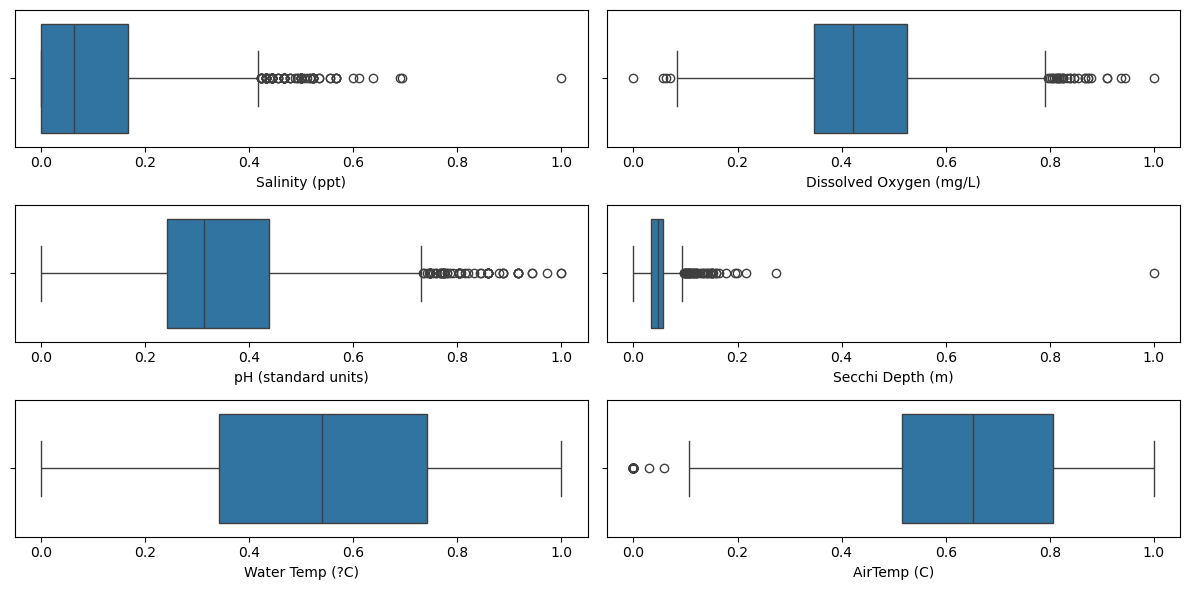

In [79]:
f, ax= plt.subplots(3,2 , figsize=(12,6))
ax = ax.flatten()

for index, cols in enumerate(X_scaled_df.columns):
    sns.boxplot(data = X_scaled_df, x = cols , ax = ax[index])
    
plt.tight_layout()
plt.show()

## Local Outlier Detection 

In [80]:
# Wrapper for LocalOutlierFactor with get_params and set_params methods
class LOFWrapper:
    def __init__(self, n_neighbors=20, contamination=0.1):
        self.n_neighbors = n_neighbors
        self.contamination = contamination
        self.model = LocalOutlierFactor(n_neighbors=self.n_neighbors, contamination=self.contamination)

    def fit(self, X, y=None):
        self.model = LocalOutlierFactor(n_neighbors=self.n_neighbors, contamination=self.contamination)
        self.model.fit(X)
        return self

    def score(self, X, y=None):
        scores = -self.model.negative_outlier_factor_
        return np.mean(scores)  # Return a custom score (mean of LOF scores in this example)

    def get_params(self, deep=True):
        return {"n_neighbors": self.n_neighbors, "contamination": self.contamination}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

In [81]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': list(range(3, 101)),
    'contamination': np.linspace(0.01, 0.1, 5)  # From 1% to 10% contamination
}

# Create the GridSearchCV object
lof_model = LOFWrapper()
grid_search = GridSearchCV(estimator=lof_model, param_grid=param_grid, cv=3)
grid_search.fit(df_scaled_)  # X_scaled should be your scaled input data

# Display the best parameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'contamination': 0.01, 'n_neighbors': 88}
Best Score: 1.1461554947113977


In [82]:
for column in select_df.columns:
    model = LocalOutlierFactor(n_neighbors=88, contamination=0.01)
    
    df_scaled[f'{column}_anomaly'] = model.fit_predict(df_scaled[[column]])
    
    df_scaled[f'{column}_anomaly'] = df_scaled[f'{column}_anomaly'] == -1

In [83]:
df_scaled.columns

Index(['Salinity (ppt)', 'Dissolved Oxygen (mg/L)', 'pH (standard units)',
       'Secchi Depth (m)', 'Water Temp (?C)', 'AirTemp (C)',
       'Salinity (ppt)_anomaly', 'Dissolved Oxygen (mg/L)_anomaly',
       'pH (standard units)_anomaly', 'Secchi Depth (m)_anomaly',
       'Water Temp (?C)_anomaly', 'AirTemp (C)_anomaly'],
      dtype='object')

In [84]:
fig = make_subplots(rows=3, cols=2, subplot_titles=[
    'Salinity (ppt)', 'Dissolved Oxygen (mg/L)', 
    'pH (standard units)', 'Secchi Depth (m)', 
    'Water Temp (°C)', 'Air Temp (°C)'
])

# Adding plots
fig.add_trace(go.Scatter(x=df_scaled.index, y=df_scaled['Salinity (ppt)'], mode='lines', name='Salinity (ppt)'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_scaled.index[df_scaled['Salinity (ppt)_anomaly']], 
                         y=df_scaled['Salinity (ppt)'][df_scaled['Salinity (ppt)_anomaly']], 
                         mode='markers', marker=dict(color='red', size=7)), row=1, col=1)

fig.add_trace(go.Scatter(x=df_scaled.index, y=df_scaled['Dissolved Oxygen (mg/L)'], mode='lines', name='Dissolved Oxygen (mg/L)'), row=1, col=2)
fig.add_trace(go.Scatter(x=df_scaled.index[df_scaled['Dissolved Oxygen (mg/L)_anomaly']], 
                         y=df_scaled['Dissolved Oxygen (mg/L)'][df_scaled['Dissolved Oxygen (mg/L)_anomaly']], 
                         mode='markers', marker=dict(color='red', size=7)), row=1, col=2)

fig.add_trace(go.Scatter(x=df_scaled.index, y=df_scaled['pH (standard units)'], mode='lines', name='pH (standard units)'), row=2, col=1)
fig.add_trace(go.Scatter(x=df_scaled.index[df_scaled['pH (standard units)_anomaly']], 
                         y=df_scaled['pH (standard units)'][df_scaled['pH (standard units)_anomaly']], 
                         mode='markers', marker=dict(color='red', size=7)), row=2, col=1)

fig.add_trace(go.Scatter(x=df_scaled.index, y=df_scaled['Secchi Depth (m)'], mode='lines', name='Secchi Depth (m)'), row=2, col=2)
fig.add_trace(go.Scatter(x=df_scaled.index[df_scaled['Secchi Depth (m)_anomaly']], 
                         y=df_scaled['Secchi Depth (m)'][df_scaled['Secchi Depth (m)_anomaly']], 
                         mode='markers', marker=dict(color='red', size=7)), row=2, col=2)

fig.add_trace(go.Scatter(x=df_scaled.index, y=df_scaled['Water Temp (?C)'], mode='lines', name='Water Temp (?C)'), row=3, col=1)
fig.add_trace(go.Scatter(x=df_scaled.index[df_scaled['Water Temp (?C)_anomaly']], 
                         y=df_scaled['Water Temp (?C)'][df_scaled['Water Temp (?C)_anomaly']], 
                         mode='markers', marker=dict(color='red', size=7)), row=3, col=1)

fig.add_trace(go.Scatter(x=df_scaled.index, y=df_scaled['AirTemp (C)'], mode='lines', name='AirTemp (C)'), row=3, col=2)
fig.add_trace(go.Scatter(x=df_scaled.index[df_scaled['AirTemp (C)_anomaly']], 
                         y=df_scaled['AirTemp (C)'][df_scaled['AirTemp (C)_anomaly']], 
                         mode='markers', marker=dict(color='red', size=7)), row=3, col=2)

fig.update_layout(showlegend=False, height=800, width=1000)
fig.show()